In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


In [25]:
wine = pd.read_csv('/Users/erikmartinez/Desktop/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


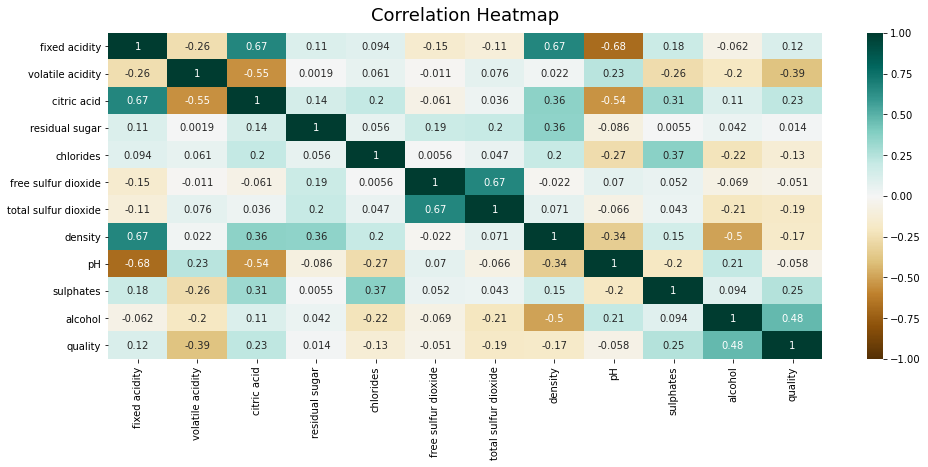

In [5]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(wine.corr(), vmin = -1, vmax=1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

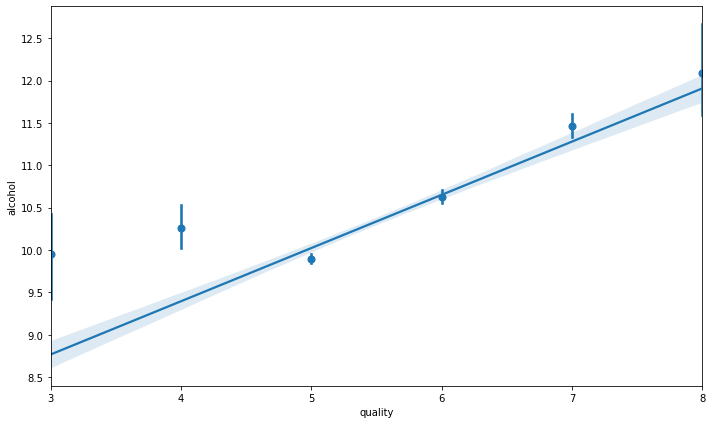

In [6]:
fig, axes = plt.subplots(1)
sns.regplot(x="quality", y="alcohol", data=wine, x_estimator=np.mean)
fig.set_figheight(6)
fig.set_figwidth(10)
plt.tight_layout(w_pad = 10)

In [7]:
#Correlation with output variable
cor = wine.corr()
cor_target = abs(cor["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.45]
relevant_features

alcohol    0.476166
quality    1.000000
Name: quality, dtype: float64

In [8]:
Group_names =['bad', 'good', 'great']
Categories = pd.cut(wine['quality'], bins = [2,4,6,8], labels= Group_names)
wine['quality'] = Categories

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [10]:
X = wine.loc[:, ['alcohol']]
y = wine.loc[:, ['quality']]

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler #Standardizes the data 
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [36]:
from sklearn.svm import SVC
CL = SVC(kernel = 'poly', degree = 2)
CL.fit(X_train, y_train)
y_pred = CL.predict(X_test)

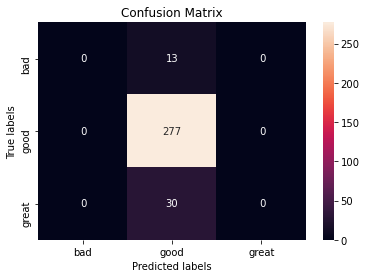

In [38]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['bad', 'good', 'great']); ax.yaxis.set_ticklabels(['bad', 'good', 'great']);

In [236]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = CL, X = X_train,
                             y = y_train, cv = 10)
accuracies.mean()

0.8147022637795276